In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')
#Encoding is latin-1 because default read_csv had trouble reading file

# Data Preparation

In [128]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [129]:
df.shape

(4600, 29)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [131]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [132]:
df = df[[
    'Track', 'Album Name', 'Artist', 'Release Date',
    #'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       #'Spotify Playlist Count', 'Spotify Playlist Reach',
       #'Spotify Popularity',
     'YouTube Views',
    # 'YouTube Likes',
    #'TikTok Posts',
    #   'TikTok Likes',
     'TikTok Views',
    # 'YouTube Playlist Reach',
     #  'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
      # 'Deezer Playlist Count', 'Deezer Playlist Reach',
      # 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
      # 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'
]].copy()

In [133]:
df = df.rename(columns={'Album Name' : 'Album_Name',
                   'Release Date' : 'Release_Date',
                   'All Time Rank' : 'All_Time_Rank',
                   'Track Score' : 'Track_Score',
                   'Spotify Streams' : 'Spotify_Streams',
                   'YouTube Views' : 'YouTube_Views',
                   'YouTube Likes' : 'YouTube_Likes',
                   'TikTok Posts' : 'TikTok_Posts',
                   'TikTok Likes' : 'TikTok_Likes',
                   'TikTok Views' : 'TikTok_Views',
                   'Explicit Track' : 'Explicit_Track'})

In [134]:
df.isna().sum()

,0
Track,0
Album_Name,0
Artist,5
Release_Date,0
All_Time_Rank,0
Track_Score,0
Spotify_Streams,113
YouTube_Views,308
TikTok_Views,981
Explicit_Track,0


In [135]:
df.loc[df.duplicated()]

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,"2,424",28.9,"227,893,586","30,913,276","117,505,652",0
3450,Dembow,Dembow,Danny Ocean,12/8/2017,"3,441",23.3,"579,189,526","828,853,696","158,504,854",0


In [136]:
df.query('Track == "Too Sweet"'), \
df.query('Track == "Espresso"')

(         Track               Album_Name  Artist Release_Date All_Time_Rank  \
 34   Too Sweet  Unreal Unearth: Unheard  Hozier    3/22/2024            35   
 157  Too Sweet  Unreal Unearth: Unheard  Hozier    3/22/2024           158   
 
      Track_Score Spotify_Streams YouTube_Views TikTok_Views  Explicit_Track  
 34         231.6     532,012,790    62,123,098          NaN               0  
 157        121.2     532,012,790    13,119,247          NaN               0  ,
         Track Album_Name             Artist Release_Date All_Time_Rank  \
 21   Espresso   Espresso  Sabrina Carpenter    4/12/2024            22   
 865  Espresso   Espresso  Sabrina Carpenter    4/11/2024           861   
 935  Espresso   Espresso  Sabrina Carpenter    4/12/2024           933   
 
      Track_Score Spotify_Streams YouTube_Views   TikTok_Views  Explicit_Track  
 21         281.5     547,882,871   107,550,212  1,379,499,000               1  
 865         52.4     536,986,458           NaN            

In [137]:
df = df.loc[~df.duplicated(subset=['Track', 'Album_Name', 'Release_Date'])] \
.reset_index(drop=True)

In [138]:
df.shape

(4576, 10)

In [139]:
df.head()

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","84,274,754","5,332,281,936",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","116,347,040","208,339,025",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","122,599,116","3,369,120,610",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","1,096,100,899","14,603,725,994",0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","77,373,957",NaN,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Track            4576 non-null   object 
 1   Album_Name       4576 non-null   object 
 2   Artist           4571 non-null   object 
 3   Release_Date     4576 non-null   object 
 4   All_Time_Rank    4576 non-null   object 
 5   Track_Score      4576 non-null   float64
 6   Spotify_Streams  4464 non-null   object 
 7   YouTube_Views    4286 non-null   object 
 8   TikTok_Views     3614 non-null   object 
 9   Explicit_Track   4576 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 357.6+ KB


In [141]:
df = df.dropna(axis=0).reset_index(drop=True)

In [142]:
cols = ['Spotify_Streams', 'YouTube_Views', 'TikTok_Views', 'All_Time_Rank']

for col in cols:
  df[col] = df[col].str.replace(',', '').astype(int)

In [143]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [144]:
df.shape

(3515, 10)

# Feature Understanding and Relationships

Text(0, 0.5, 'Frequency')

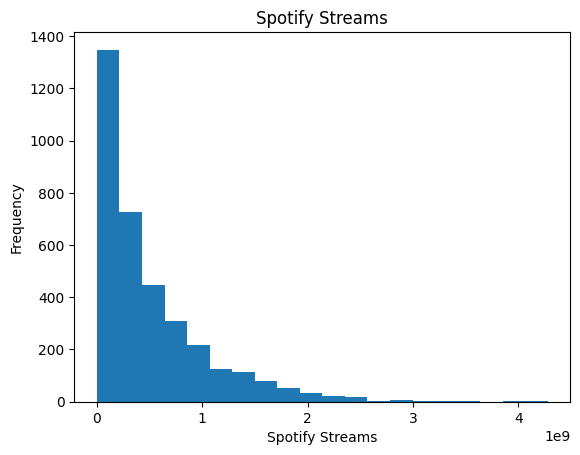

In [145]:
ax = df['Spotify_Streams'].plot(kind='hist', bins=20, title="Spotify Streams")

ax.set_xlabel("Spotify Streams")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

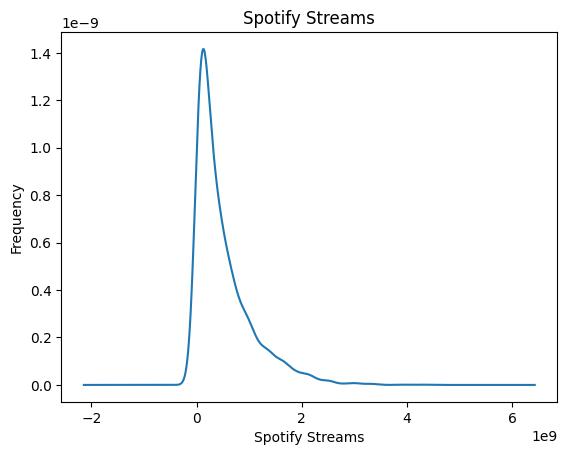

In [146]:
ax = df['Spotify_Streams'].plot(kind='kde', title="Spotify Streams")

ax.set_xlabel("Spotify Streams")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

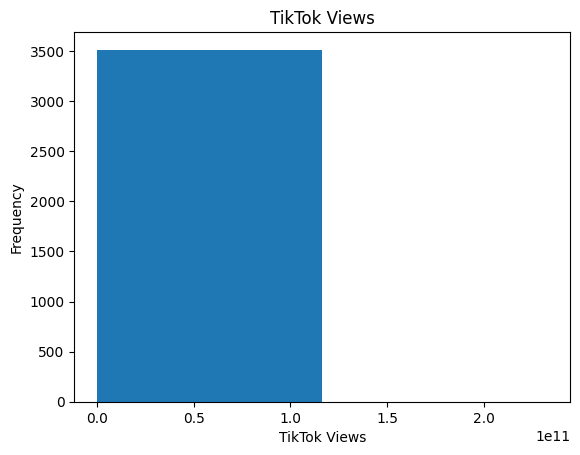

In [178]:
ax = df['TikTok_Views'].plot(kind='hist', title="TikTok Views", bins=2)

ax.set_xlabel("TikTok Views")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

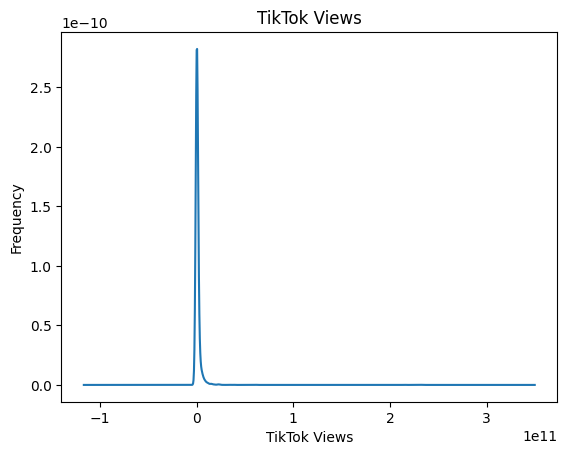

In [180]:
ax = df['TikTok_Views'].plot(kind='kde', title="TikTok Views")

ax.set_xlabel("TikTok Views")
ax.set_ylabel("Frequency")

<Axes: xlabel='Spotify_Streams', ylabel='TikTok_Views'>

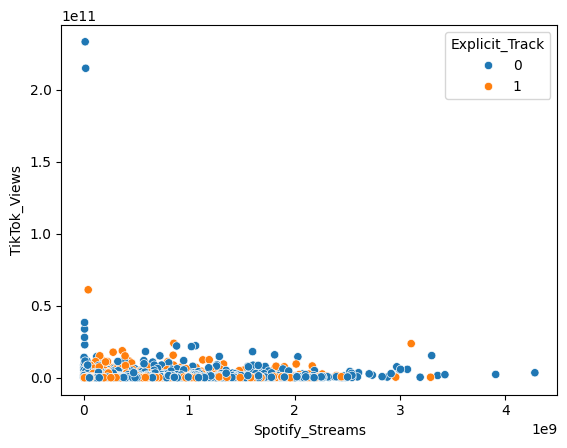

In [149]:
sns.scatterplot(x='Spotify_Streams', y='TikTok_Views', data=df, hue='Explicit_Track')

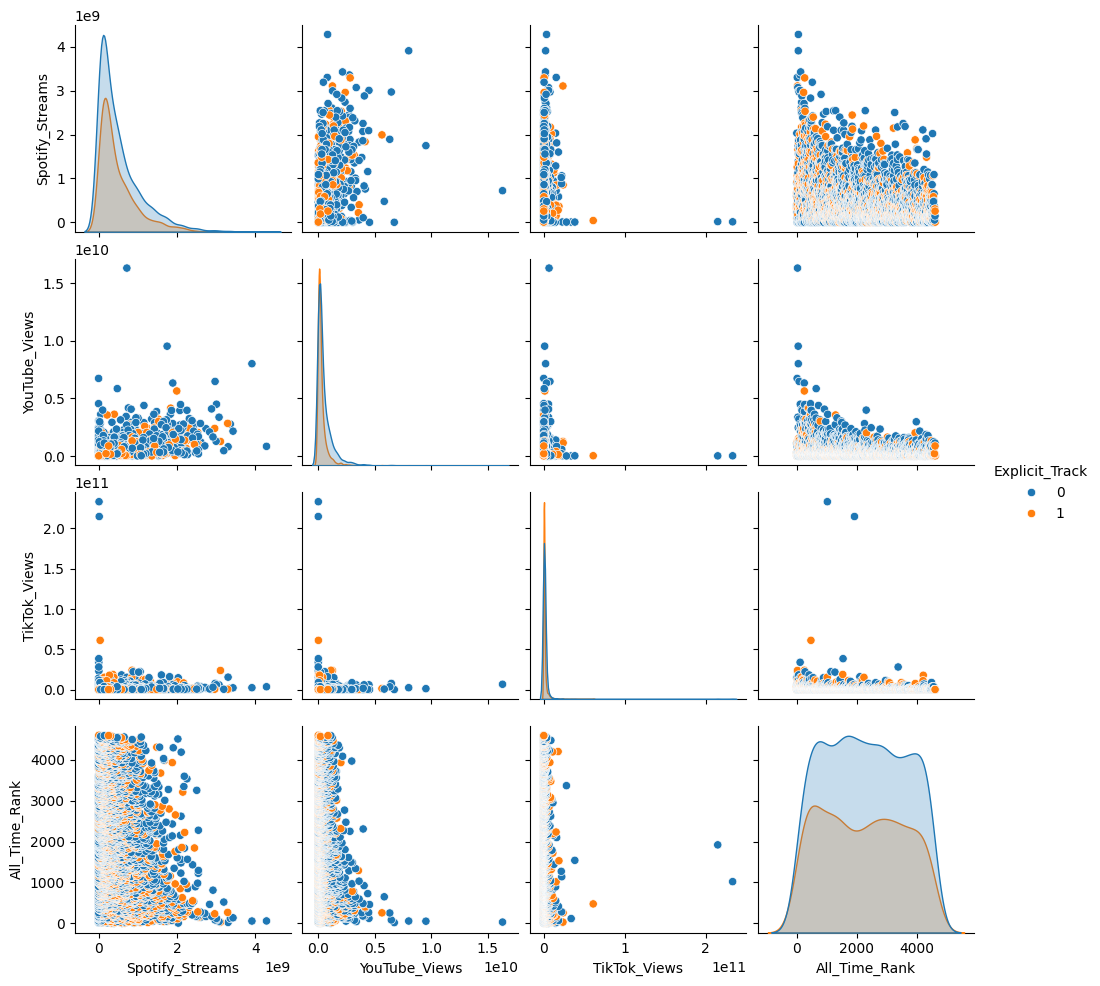

In [150]:
sns.pairplot(df, vars=['Spotify_Streams', 'YouTube_Views','TikTok_Views', 'All_Time_Rank'],
             hue='Explicit_Track')

plt.show()

In [151]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [152]:
df[numerical_features].corr()

,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track
All_Time_Rank,1.000000,-0.630500,-0.338788,-0.247375,-0.108547,-0.031336
Track_Score,-0.630500,1.000000,0.277768,0.221891,0.113849,0.034026
Spotify_Streams,-0.338788,0.277768,1.000000,0.477195,0.033211,-0.027967
YouTube_Views,-0.247375,0.221891,0.477195,1.000000,0.004794,-0.150115
TikTok_Views,-0.108547,0.113849,0.033211,0.004794,1.000000,-0.013931
Explicit_Track,-0.031336,0.034026,-0.027967,-0.150115,-0.013931,1.000000


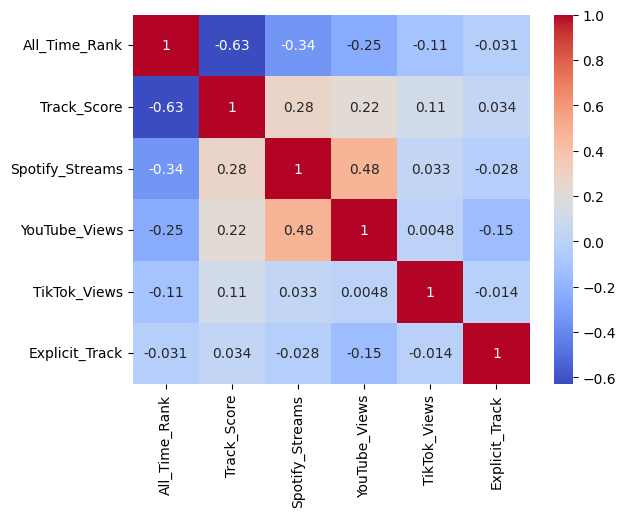

In [153]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [154]:
df.columns

Index(['Track', 'Album_Name', 'Artist', 'Release_Date', 'All_Time_Rank',
       'Track_Score', 'Spotify_Streams', 'YouTube_Views', 'TikTok_Views',
       'Explicit_Track'],
      dtype='object')

# Questions About DataSet

Are there any correlations between either spotify streams, tiktok views, and youtube views?

Is track score only based on spotify streams?

Do explicit tracks perform better than non-explicit tracks?

Which song has the fastest growing view and stream count based on release date?

Are there different songs at the top of each stream and view count?

In [155]:
df['YouTube_Views'].corr(df['Spotify_Streams'])
#YouTube Views and Spotify Streams are much more correlated than anything else

0.47719511216284777

In [156]:
df['Days_Since_Release'] = df['Release_Date'] - pd.to_datetime('today')
df['Days_Since_Release'] = df['Days_Since_Release'].dt.days * -1

In [157]:
df['Stream_Per_Day'] = df['Spotify_Streams'] / df['Days_Since_Release']
df['YT_Per_Day'] = df['YouTube_Views'] / df['Days_Since_Release']
df['TikTok_Per_Day'] = df['TikTok_Views'] / df['Days_Since_Release']

In [158]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

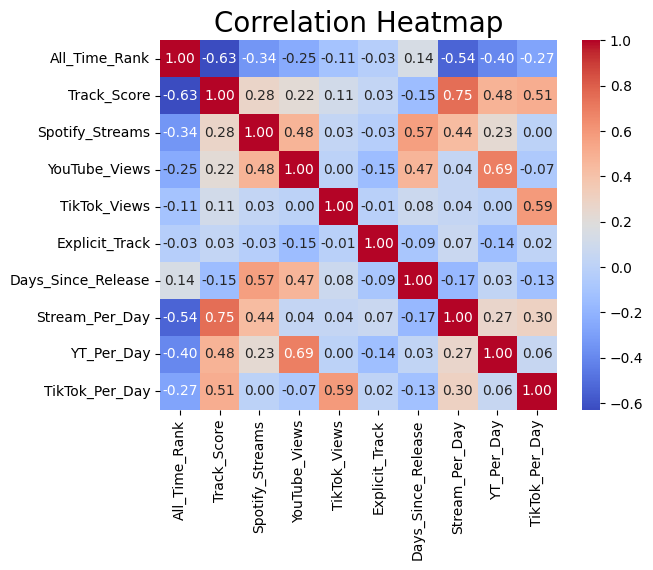

In [159]:
c = sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt = ".2f")

c.axes.set_title('Correlation Heatmap', fontsize=20)

plt.show()

#Track Score is very correlated with streams per day, so that must be a big marker for Track Score,
#but TikTok and YT views per day are also correlated so they must also play some part

In [164]:
df.sort_values(by='Stream_Per_Day', ascending=False).head(10)
#Espresso by Sabrina Carpenter has the fastest growing song based on Streams

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track,Days_Since_Release,Stream_Per_Day,YT_Per_Day,TikTok_Per_Day
17,Espresso,Espresso,Sabrina Carpenter,2024-04-12,22,281.5,547882871,107550212,1379499000,1,120,4.565691e+06,8.962518e+05,1.149582e+07
5,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,7,407.2,900158751,308723145,534915313,0,205,4.391018e+06,1.505967e+06,2.609343e+06
117,Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto),Jung Kook,2023-07-14,156,122.4,1673557134,397523735,761760624,1,393,4.258415e+06,1.011511e+06,1.938322e+06
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,601309283,122599116,3369120610,0,144,4.175759e+06,8.513828e+05,2.339667e+07
15,As It Was,As It Was,Harry Styles,2022-03-31,20,292.0,3301814535,800899315,15405881843,0,863,3.825973e+06,9.280409e+05,1.785154e+07
13,greedy,greedy,Tate McRae,2023-09-14,18,293.7,1258569694,141646818,5456156211,1,331,3.802325e+06,4.279360e+05,1.648386e+07
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,390470936,84274754,5332281936,0,106,3.683688e+06,7.950448e+05,5.030455e+07
6,Gata Only,Gata Only,FloyyMenor,2024-02-02,8,375.8,675079153,228382568,3804584163,1,190,3.553048e+06,1.202014e+06,2.002413e+07
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2031280633,1096100899,14603725994,0,576,3.526529e+06,1.902953e+06,2.535369e+07
12,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,17,297.6,395433400,104673836,207317000,0,114,3.468714e+06,9.181915e+05,1.818570e+06


In [165]:
df.sort_values(by='YT_Per_Day', ascending=False).head(10)
#bathroom floor by Kids With Buns is fastest growing per YT views

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track,Days_Since_Release,Stream_Per_Day,YT_Per_Day,TikTok_Per_Day
10,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,15,301.6,297185,6736502312,22234,0,673,4.415825e+02,1.000966e+07,3.303715e+01
21,Baby Shark,ýýýýýýýýý ýýýýýý ýýýýýýýýýýýý,Pinkfong,2015-12-01,28,265.7,720822868,16322756555,6577639193,0,3175,2.270308e+05,5.141026e+06,2.071697e+06
38,Panda Basi,Panda Basi - EP,Mvua,2023-02-10,52,200.3,104271,2457026781,393580,0,547,1.906234e+02,4.491822e+06,7.195247e+02
37,Despacito,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,50,203.5,1747093405,9537135721,1143297071,0,2766,6.316317e+05,3.447988e+06,4.133395e+05
87,Hands,Hands,Dianï¿½,2022-08-01,115,143.9,126914,2435813922,6415,0,740,1.715054e+02,3.291640e+06,8.668919e+00
96,Drained of Color,Drained of Color,Exhumed,2022-08-30,129,134.0,158627,2156140830,4484,0,711,2.231041e+02,3.032547e+06,6.306610e+00
40,Shape of You,Shape of You,Ed Sheeran,2017-01-06,54,195.1,3909458734,8013997219,2320856331,0,2773,1.409830e+06,2.890010e+06,8.369478e+05
105,Back,Back,LOLA,2022-08-03,140,128.0,48428,2123978358,735317,0,738,6.562060e+01,2.878019e+06,9.963645e+02
22,SHEESH,BABYMONS7ER,BABYMONSTER,2024-04-01,32,237.5,124893397,359896095,390081328,0,131,9.533847e+05,2.747298e+06,2.977720e+06
56,Perfect,ýý (Deluxe),Ed Sheeran,2017-03-03,81,167.5,2969999682,6473698897,7647479866,0,2717,1.093117e+06,2.382664e+06,2.814678e+06


In [166]:
df.sort_values(by='TikTok_Per_Day', ascending=False).head(10)
#MILLION DOLLAR BABY by Tommy Richman is fastest growing per TikTok views

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,YouTube_Views,TikTok_Views,Explicit_Track,Days_Since_Release,Stream_Per_Day,YT_Per_Day,TikTok_Per_Day
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,390470936,84274754,5332281936,0,106,3.683688e+06,7.950448e+05,5.030455e+07
835,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,1018,47.6,11477477,11457166,233232311463,0,4835,2.373832e+03,2.369631e+03,4.823833e+07
44,Very Cute Melody by Marimba Tone (39813),Very Cute Melody by Marimba Tone (39813),mitsu sound,2023-12-31,62,186.5,1384,222076,8811416708,0,223,6.206278e+00,9.958565e+02,3.951308e+07
85,Aesthetic,Aesthetic,Tollan Kim,2022-03-04,114,144.0,5712985,3120073,33870791454,0,890,6.419084e+03,3.505700e+03,3.805707e+07
381,Oh No,Cold As Ice,Kreepa,2019-12-13,473,70.6,40284121,17978707,61088562861,1,1702,2.366870e+04,1.056328e+04,3.589222e+07
18,TEXAS HOLD 'EM,TEXAS HOLD 'EM,Beyoncï¿,2024-02-10,24,278.9,426700979,35724356,6518604175,1,182,2.344511e+06,1.962877e+05,3.581651e+07
1527,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,2005-01-01,1918,33.1,16326628,7603329,214843956590,0,7161,2.279937e+03,1.061769e+03,3.000195e+07
19,Beat Automotivo Tan Tan Tan Viral,Beat Automotivo Tan Tan Tan Viral,WZ Beat,2022-05-24,26,268.1,7382759,4233958,22918660728,0,809,9.125784e+03,5.233570e+03,2.832962e+07
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2031280633,1096100899,14603725994,0,576,3.526529e+06,1.902953e+06,2.535369e+07
30,Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...,Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...,sped up 8282,2023-04-08,42,211.2,170970614,22280037,12196985599,1,490,3.489196e+05,4.546946e+04,2.489181e+07


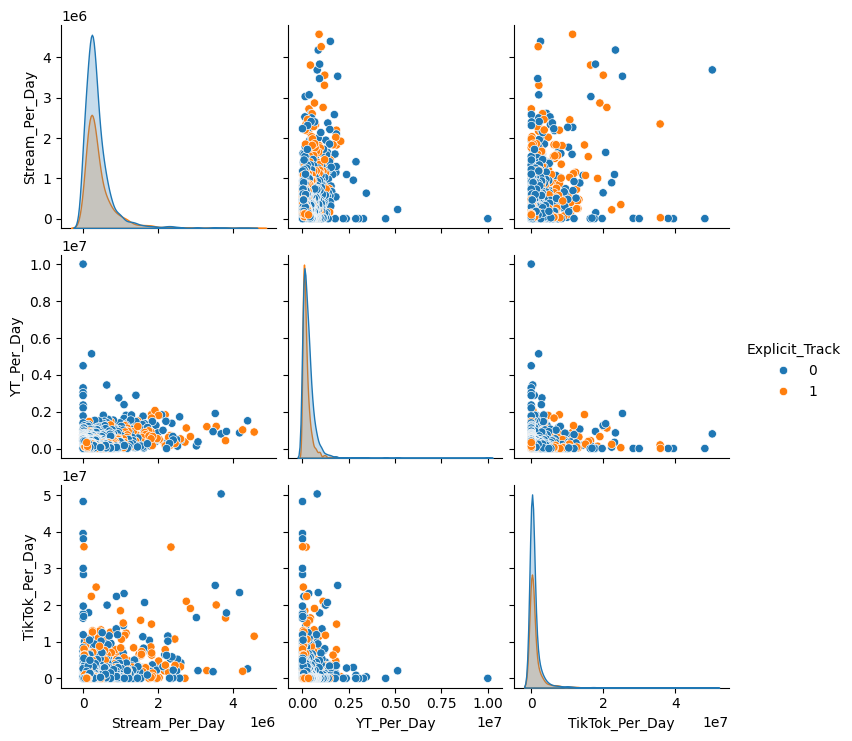

In [169]:
sns.pairplot(df, vars=['Stream_Per_Day', 'YT_Per_Day','TikTok_Per_Day'],
             hue='Explicit_Track')
plt.show()

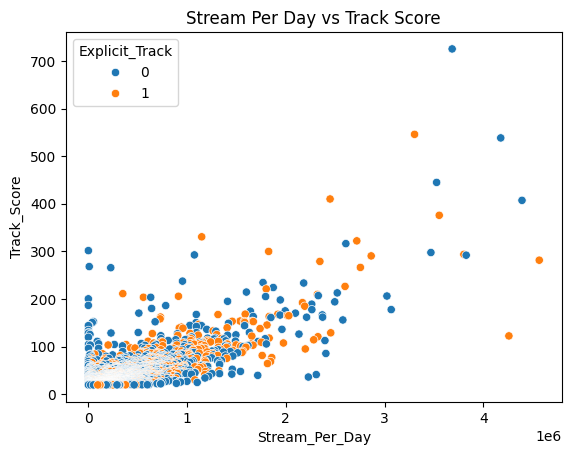

In [181]:
c = sns.scatterplot(x='Stream_Per_Day', y='Track_Score', data=df, hue='Explicit_Track')
c.set_title('Stream Per Day vs Track Score')
plt.show()
#A song being explicit or not doesn't seem to have too much effect on its success